COMPARING DIFFERENT ALGORITHMS

In [ ]:
#comparison of models
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the heart dataset
data = pd.read_csv('heart.csv')

# Check the structure and missing values
print(data.shape)
print(data.isnull().sum())
print(data['target'].value_counts())

# Load the spo2 dataset
spo2_data = pd.read_csv('spo2_data.csv')  # Ensure the file path is correct

# Verify spo2 data has the same number of rows as heart dataset
print(spo2_data.shape)

# Assuming spo2_data has only one column "spo2" and corresponds to each record in heart dataset
# Concatenate the spo2 column with the heart dataset
data['spo2'] = spo2_data['spo2']

# Check for missing values in the spo2 column
print(data.isnull().sum())

# Handle missing values in 'spo2' by imputing the median
imputer = SimpleImputer(strategy='median')
data['spo2'] = imputer.fit_transform(data[['spo2']])

# Verify there are no missing values left
print(data.isnull().sum())

# Let's transform categorical values into dummies/Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Split the data into features (X) and target (y)
y = data['target']
X = data.drop('target', axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define models
LR_classifier = LogisticRegression(random_state=0)
clf = svm.SVC()
sgd = SGDClassifier()
forest = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=6)
treee = tree.DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6)

# Fit models on training data
LR_classifier.fit(X_train, y_train)
clf.fit(X_train, y_train)
sgd.fit(X_train, y_train)
treee.fit(X_train, y_train)
forest.fit(X_train, y_train)

# Training accuracy
y_pred_train_LR = LR_classifier.predict(X_train)
y_pred_train_svm = clf.predict(X_train)
y_pred_train_sgd = sgd.predict(X_train)
y_pred_train_tree = treee.predict(X_train)
y_pred_train_forest = forest.predict(X_train)

print("Training Accuracies: \n")
print(f"Logistic Regression: {accuracy_score(y_train, y_pred_train_LR)}")  # Logistic Regression
print(f"SVM: {accuracy_score(y_train, y_pred_train_svm)}")                 # SVM
print(f"SGD: {accuracy_score(y_train, y_pred_train_sgd)}")                 # SGD
print(f"Decision Tree: {accuracy_score(y_train, y_pred_train_tree)}")      # Decision Tree
print(f"Random Forest: {accuracy_score(y_train, y_pred_train_forest)}\n")    # Random Forest

# Test accuracy
y_pred_test_LR = LR_classifier.predict(X_test)
y_pred_test_svm = clf.predict(X_test)
y_pred_test_sgd = sgd.predict(X_test)
y_pred_test_tree = treee.predict(X_test)
y_pred_test_forest = forest.predict(X_test)

print("Test Accuracies: \n")
print(f"Logistic Regression: {accuracy_score(y_test, y_pred_test_LR)}")   # Logistic Regression
print(f"SVM: {accuracy_score(y_test, y_pred_test_svm)}")                  # SVM
print(f"SGD: {accuracy_score(y_test, y_pred_test_sgd)}")                  # SGD
print(f"Decision Tree: {accuracy_score(y_test, y_pred_test_tree)}")       # Decision Tree
print(f"Random Forest: {accuracy_score(y_test, y_pred_test_forest)}")     # Random Forest


(1025, 14)
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
target
1    526
0    499
Name: count, dtype: int64
(1023, 1)
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
spo2        2
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
spo2        0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracies: 

Logistic Regression: 0.8675034867503487
SVM: 0.6903765690376569
SGD: 0.7210599721059973
Decision Tree: 0.9497907949790795
Random Forest: 0.9693165969316597

Test Accuracies: 

Logistic Regression: 0.8928571428571429
SVM: 0.7435064935064936
SGD: 0.7435064935064936
Decision Tree: 0.9090909090909091
Random Forest: 0.9512987012987013


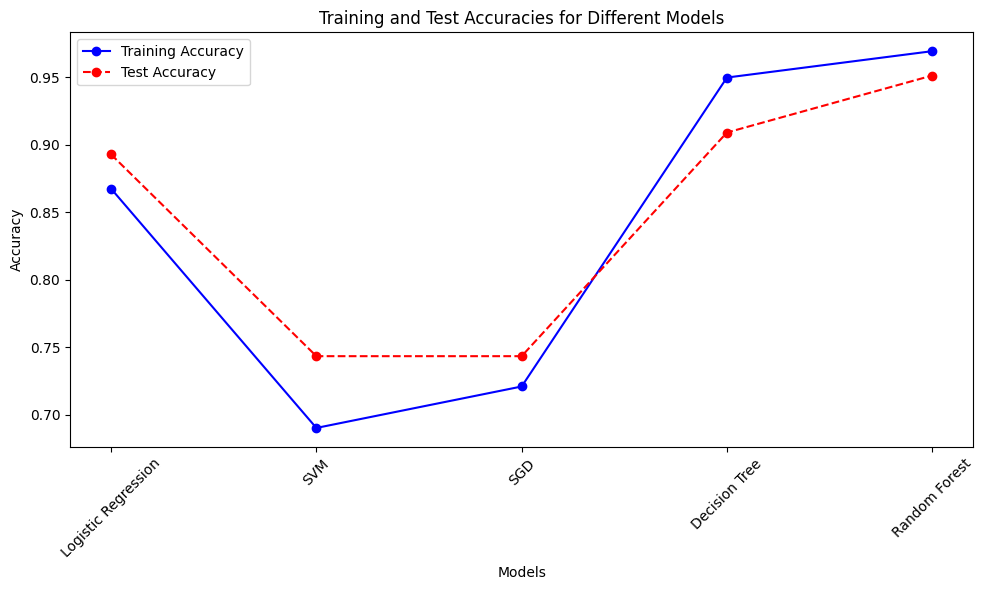

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'SVM', 'SGD', 'Decision Tree', 'Random Forest']

# Training and Test accuracies
train_accuracies = [0.8675034867503487, 0.6903765690376569, 0.7210599721059973, 0.9497907949790795, 0.9693165969316597]
test_accuracies = [0.8928571428571429, 0.7435064935064936, 0.7435064935064936, 0.9090909090909091, 0.9512987012987013]

# Plotting the accuracies
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting training and test accuracies
ax.plot(models, train_accuracies, label='Training Accuracy', marker='o', linestyle='-', color='b')
ax.plot(models, test_accuracies, label='Test Accuracy', marker='o', linestyle='--', color='r')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Test Accuracies for Different Models')
ax.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


FEATURE IMPORTANCE

In [ ]:
#feature imp
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the heart dataset
data = pd.read_csv('heart.csv')

# Check the structure and missing values
print(data.shape)
print(data.isnull().sum())
print(data['target'].value_counts())

# Load the spo2 dataset
spo2_data = pd.read_csv('spo2_data.csv')  # Ensure the file path is correct

# Concatenate the spo2 column with the heart dataset
data['spo2'] = spo2_data['spo2']

# Handle missing values in 'spo2' by imputing the median
imputer = SimpleImputer(strategy='median')
data['spo2'] = imputer.fit_transform(data[['spo2']])

# Transform categorical values into dummies
data = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Split the data into features (X) and target (y)
y = data['target']
X = data.drop('target', axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define models
forest = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=6)
treee = tree.DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6)

# Fit models on training data
forest.fit(X_train, y_train)
treee.fit(X_train, y_train)

# Test accuracy
y_pred_test_forest = forest.predict(X_test)
y_pred_test_tree = treee.predict(X_test)

print("Test Accuracies: \n")
print(f"Random Forest: {accuracy_score(y_test, y_pred_test_forest)}")     # Random Forest
print(f"Decision Tree: {accuracy_score(y_test, y_pred_test_tree)}")       # Decision Tree

# Function to calculate feature importance
def calculate_feature_importance(model, feature_names):
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
    return feature_importance_df

# Calculate feature importance for Random Forest and Decision Tree
forest_importance = calculate_feature_importance(forest, X.columns)
tree_importance = calculate_feature_importance(treee, X.columns)

# Display feature importance
print("\nFeature Importance for Random Forest:\n", forest_importance)
print("\nFeature Importance for Decision Tree:\n", tree_importance)

# Function to make predictions using a DataFrame input
def make_prediction(model, input_data, feature_names):
    # Create a DataFrame with the correct feature names
    input_data_df = pd.DataFrame(columns=feature_names)

    # Set all values to 0 initially
    input_data_df.loc[0] = 0

    # Populate the DataFrame with input data
    input_data_df.loc[0, feature_names] = input_data

    # Make prediction
    prediction = model.predict(input_data_df)
    return prediction

# Feature names after one-hot encoding
feature_names = X.columns.tolist()

# Example input data for prediction (adjusted to match the feature count)
input_data = (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2, 98.0)  # Last value is 'spo2'

# Add dummy variables as needed (make sure to adjust this based on your specific encoding)
input_data_full = [62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 98.0]  # Fill with zeros for dummy vars

# Make predictions
result_forest = make_prediction(forest, input_data_full, feature_names)
result_tree = make_prediction(treee, input_data_full, feature_names)

# Print results
for model, result in zip(['Random Forest', 'Decision Tree'], [result_forest, result_tree]):
    if result == 0:
        print(f'The Person does not have Heart Disease according to {model}.')
    else:
        print(f'The Person has Heart Disease according to {model}.')


(1025, 14)
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
target
1    526
0    499
Name: count, dtype: int64
Test Accuracies: 

Random Forest: 0.9512987012987013
Decision Tree: 0.9090909090909091

Feature Importance for Random Forest:
       Feature  Importance
0     thalach    0.126567
1     oldpeak    0.097161
2      thal_2    0.093550
3        cp_0    0.087981
4        ca_0    0.062878
5     exang_1    0.060895
6     exang_0    0.058866
7         age    0.058453
8    trestbps    0.053060
9      thal_3    0.050219
10       chol    0.045901
11    slope_2    0.029645
12      sex_1    0.028303
13       cp_2    0.027749
14    slope_1    0.024969
15       ca_1    0.017811
16       cp_3    0.013254
17       ca_2    0.012092
18      sex_0    0.010336
19       spo2    0.006604
20  restecg_0    0.005852
21      fbs_1    0.005740
22  

<ipython-input-13-c46c9b0939ef>:83: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  input_data_df.loc[0, feature_names] = input_data
<ipython-input-13-c46c9b0939ef>:83: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  input_data_df.loc[0, feature_names] = input_data


Accuracy  Precision    Recall  F1 Score

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the datasets
data = pd.read_csv('heart.csv')
spo2_data = pd.read_csv('spo2_data.csv')  # Make sure the path is correct

# Concatenate the spo2 column with the heart dataset
data['spo2'] = spo2_data['spo2']

# Handle missing values
imputer = SimpleImputer(strategy='median')
data['spo2'] = imputer.fit_transform(data[['spo2']])

# Convert categorical features into dummy variables
data = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Split features and target
y = data['target']
X = data.drop('target', axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': svm.SVC(),
    'SGD Classifier': SGDClassifier(max_iter=1000, tol=1e-3),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0),
    'Random Forest': RandomForestClassifier(n_estimators=20, max_depth=6, random_state=12)
}

# Train and evaluate each model
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Collect metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

# Display the results
print("Model Comparison:")
print(results_df)

# Identify the best model based on the highest F1 Score
best_model = results_df.iloc[0]
print("\nBest Model for Heart Disease Prediction:")
print(best_model)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Comparison:
                    Model  Accuracy  Precision    Recall  F1 Score
0           Random Forest  0.951299   0.940476  0.969325  0.954683
1           Decision Tree  0.909091   0.953020  0.871166  0.910256
2     Logistic Regression  0.889610   0.886228  0.907975  0.896970
3  Support Vector Machine  0.743506   0.741379  0.791411  0.765579
4          SGD Classifier  0.623377   0.927273  0.312883  0.467890

Best Model for Heart Disease Prediction:
Model        Random Forest
Accuracy          0.951299
Precision         0.940476
Recall            0.969325
F1 Score          0.954683
Name: 0, dtype: object


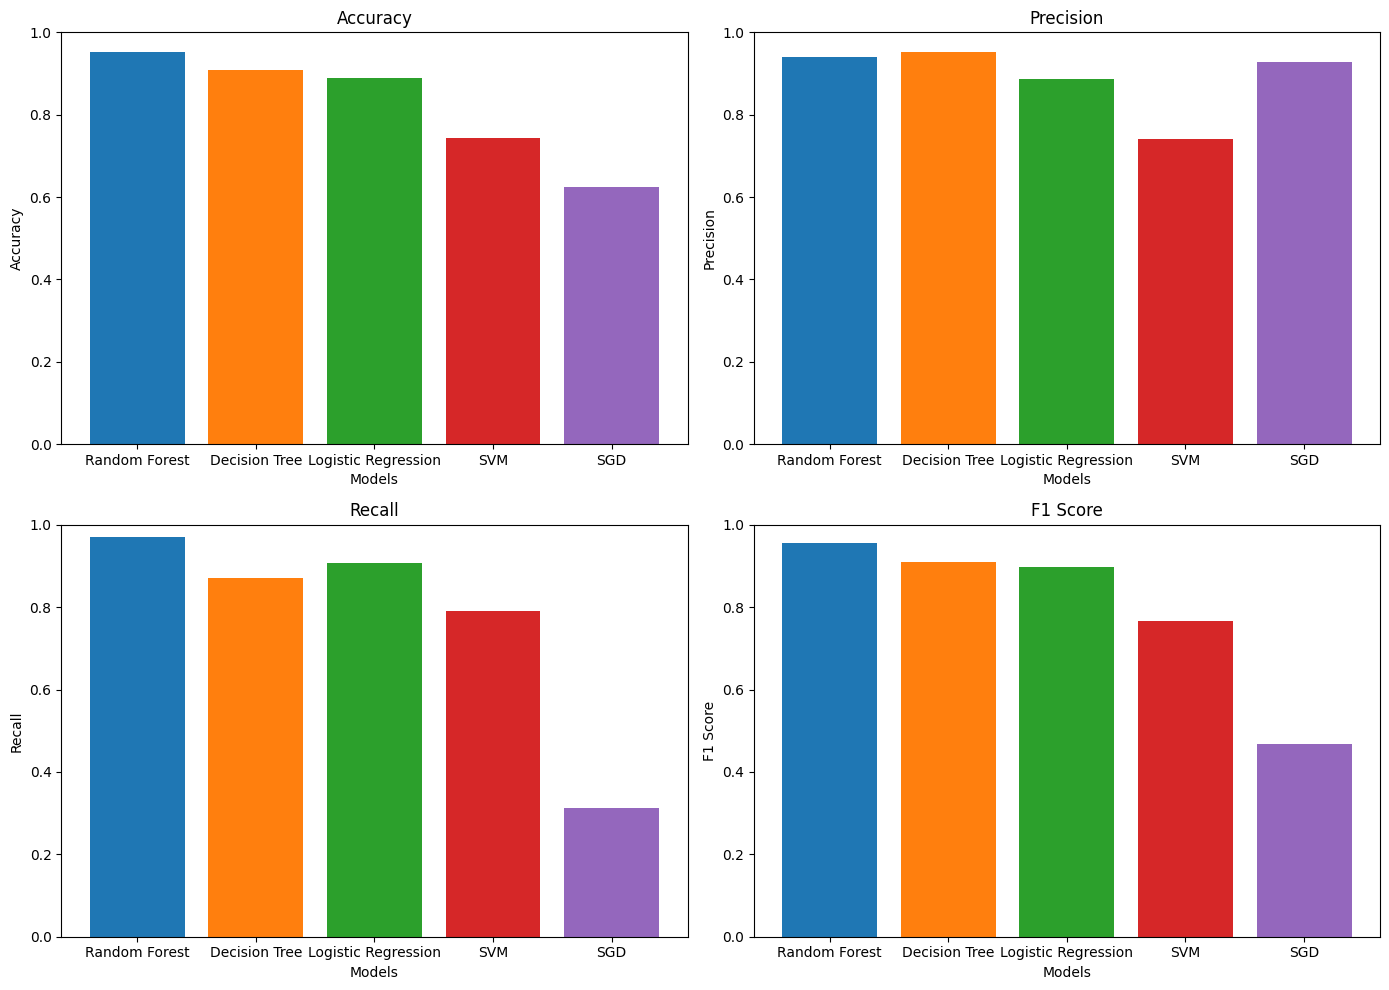

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVM', 'SGD']
0.9272
# Metrics
accuracy = [0.951299, 0.909091, 0.889610, 0.743506, 0.623377]
precision = [0.940476, 0.953020, 0.886228, 0.741379, 0.927273]
recall = [0.969325, 0.871166, 0.907975, 0.791411, 0.312883]
f1_score = [0.954683, 0.910256, 0.896970, 0.765579, 0.467890]

# Color palette (one color per model)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Blue, Orange, Green, Red, Purple

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plotting each metric
metrics = [accuracy, precision, recall, f1_score]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for i, (metric, ax) in enumerate(zip(metrics, axes.flatten())):
    ax.bar(models, metric, color=colors)
    ax.set_title(metric_names[i])
    ax.set_xlabel('Models')
    ax.set_ylabel(metric_names[i])
    ax.set_ylim(0, 1)

# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()



In [ ]:
import pickle
pickle.dump(forest, open('Random_forest_model.pkl', 'wb'))

Selecting the best algorithm, and training and testing the model


In [ ]:
####
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the heart dataset
data = pd.read_csv('heart.csv')

# Check the structure and missing values
print(data.shape)
print(data.isnull().sum())
print(data['target'].value_counts())

# Load the spo2 dataset
spo2_data = pd.read_csv('spo2_data.csv')  # Ensure the file path is correct

# Verify spo2 data has the same number of rows as heart dataset
print(spo2_data.shape)

# Assuming spo2_data has only one column "spo2" and corresponds to each record in heart dataset
# Concatenate the spo2 column with the heart dataset
data['spo2'] = spo2_data['spo2']

# Check for missing values in the spo2 column
print(data.isnull().sum())

# Handle missing values in 'spo2' by imputing the median
imputer = SimpleImputer(strategy='median')
data['spo2'] = imputer.fit_transform(data[['spo2']])

# Verify there are no missing values left
print(data.isnull().sum())

# Let's transform categorical values into dummies/Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Split the data into features (X) and target (y)
y = data['target']
X = data.drop('target', axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define models
LR_classifier = LogisticRegression(random_state=0)
clf = svm.SVC()
sgd = SGDClassifier()
forest = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=6)
treee = tree.DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6)

forest = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=6)
forest.fit(X_train, y_train)
y_pred_test_forest = forest.predict(X_test)
print(f"Initial Random Forest Test Accuracy: {accuracy_score(y_test, y_pred_test_forest)}")

# 3. Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [6, 8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up the GridSearchCV
grid_search_rf = GridSearchCV(estimator=forest, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# Fit the model with GridSearchCV to find the best parameters
grid_search_rf.fit(X_train, y_train)

# 4. Evaluate the Tuned Model
# Best parameters found by GridSearchCV
print("Best parameters for Random Forest: ", grid_search_rf.best_params_)
print("Best cross-validation accuracy for Random Forest: ", grid_search_rf.best_score_)

# Use the best estimator to make predictions on the test data
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Test accuracy with the tuned Random Forest model
print(f"Improved Random Forest Test Accuracy: {accuracy_score(y_test, y_pred_best_rf)}")

# Save the model and the feature columns
with open('heart_disease_rf_model.pkl', 'wb') as model_file:
    pickle.dump(forest, model_file)

# Save the columns used in X_train
X_train_columns = X_train.columns
with open('X_train_columns.pkl', 'wb') as col_file:
    pickle.dump(X_train_columns, col_file)

(1025, 14)
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
target
1    526
0    499
Name: count, dtype: int64
(1023, 1)
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
spo2        2
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
spo2        0
dtype: int64
Initial Random Forest Test Accuracy: 0.9512987012987013
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-va

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


DETECTION

In [ ]:
####
import numpy as np

# 1. Function to Predict Heart Disease for New Patient Data
def predict_heart_disease(patient_data, model):
    """
    Predicts heart disease (1 for presence, 0 for absence) for a given patient's data.

    :param patient_data: Dictionary of the patient's feature values.
                         Should include the same features as the original dataset.
    :param model: The trained Random Forest model.
    :return: Prediction (1: Heart disease, 0: No heart disease)
    """
    # Convert input patient data to a DataFrame (ensure it matches the format of the training data)
    patient_df = pd.DataFrame([patient_data])

    # Handle categorical variables (convert to dummies like the training data)
    patient_df = pd.get_dummies(patient_df)

    # Ensure the input data has the same columns as the training data
    missing_cols = set(X_train.columns) - set(patient_df.columns)
    for col in missing_cols:
        patient_df[col] = 0

    # Reorder columns to match the training data
    patient_df = patient_df[X_train.columns]

    # Use the model to make a prediction
    prediction = model.predict(patient_df)

    # Return the prediction
    return prediction[0]

# 2. Example: Input Data for a New Patient
# Note: This is just an example, adjust values based on real patient data
new_patient_data = {
    'age': 55,
    'sex': 1,               # 1: Male, 0: Female
    'cp': 2,                # Chest pain type (0-3)
    'trestbps': 140,        # Resting blood pressure
    'chol': 250,            # Serum cholesterol
    'fbs': 0,               # Fasting blood sugar > 120 mg/dl (1: True, 0: False)
    'restecg': 1,           # Resting electrocardiographic results (0-2)
    'thalach': 160,         # Maximum heart rate achieved
    'exang': 0,             # Exercise-induced angina (1: Yes, 0: No)
    'oldpeak': 2.3,         # ST depression induced by exercise relative to rest
    'slope': 2,             # Slope of the peak exercise ST segment (0-2)
    'ca': 0,                # Number of major vessels (0-3) colored by fluoroscopy
    'thal': 1,              # Thalassemia (1: Normal, 2: Fixed defect, 3: Reversible defect)
    'spo2': 98              # Oxygen saturation level
}

# 3. Predict whether the new patient has heart disease
prediction = predict_heart_disease(new_patient_data, best_rf)

# 4. Output the prediction result
if prediction == 1:
    print("The patient is predicted to have heart disease.")
else:
    print("The patient is predicted NOT to have heart disease.")


The patient is predicted to have heart disease.


Model saving

In [ ]:
import pickle

# After training the model (best_rf from GridSearchCV)
# Save the Random Forest model to a file
with open('heart_disease_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

print("Model saved successfully!")


Model saved successfully!
